## 03_analysis_m
  
Mourad Askar

**An in depth dive into the data in order to understand it**  
 
* Categorical variables distribution investigation
* Crash Injury Patterns Visualizations
    * Time of Day
    * Day of Week
    * Geographically

In [1]:
import pandas as pd
import numpy as np
import klib
import pandas_profiling as pp
import sweetviz
import sklearn

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from platform import python_version

%precision 2

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
pd.options.display.width = 120
pd.options.display.float_format='{:,.2f}'.format
pd.options.display.precision = 2

np.set_printoptions(precision=4, linewidth=120, suppress=True, edgeitems=5)

sns.set_style("white")

print('python',python_version())
print(np.__name__, np.__version__)
print(pd.__name__, pd.__version__)
print(klib.__name__, klib.__version__)
#print(pp.__name__, pp.__version__)
print(sklearn.__name__, sklearn.__version__)
print(sweetviz.__name__, sweetviz.__version__)

python 3.9.2
numpy 1.20.1
pandas 1.2.3
klib 0.1.5
sklearn 0.24.1
sweetviz 2.0.9


# Read Data

In [2]:
file_crash_df_parquet = 'crash_df.parquet'

crash_df = pd.read_parquet(file_crash_df_parquet)

crash_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 326488 entries, 0 to 328789
Data columns (total 32 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   crash_date               326488 non-null  datetime64[ns]
 1   crash_year               326488 non-null  int16         
 2   crash_month              326488 non-null  int8          
 3   crash_day_of_week        326488 non-null  int8          
 4   crash_hour               326488 non-null  int8          
 5   crash_time_of_day        326488 non-null  category      
 6   latitude                 326488 non-null  float32       
 7   longitude                326488 non-null  float32       
 8   beat_of_occurrence       326488 non-null  int64         
 9   address                  326488 non-null  string        
 10  street_no                326488 non-null  string        
 11  street_direction         326488 non-null  category      
 12  street_name     

In [3]:
crash_df = crash_df[(crash_df.crash_year>2017) & (crash_df.crash_year<2021)]

In [4]:
[*crash_df.columns]

['crash_date',
 'crash_year',
 'crash_month',
 'crash_day_of_week',
 'crash_hour',
 'crash_time_of_day',
 'latitude',
 'longitude',
 'beat_of_occurrence',
 'address',
 'street_no',
 'street_direction',
 'street_name',
 'posted_speed_limit',
 'traffic_control_device',
 'device_condition',
 'weather_condition',
 'lighting_condition',
 'trafficway_type',
 'alignment',
 'roadway_surface_cond',
 'road_defect',
 'first_crash_type',
 'prim_contributory_cause',
 'sec_contributory_cause',
 'num_units',
 'has_injuries',
 'has_fatal',
 'crash_type',
 'damage',
 'injuries_total',
 'injuries_fatal']

In [5]:
features_names = [
    'crash_date',
    'crash_year',
    'crash_month',
    'crash_day_of_week',
    'crash_hour',
    'crash_time_of_day', # New
    'latitude',
    'longitude',
    'beat_of_occurrence',
    'address',
#    'street_no',
#    'street_direction',
#    'street_name',
    'posted_speed_limit',
    'traffic_control_device',
    'device_condition',
    'weather_condition',
    'lighting_condition',
    'trafficway_type',
    'alignment',
    'roadway_surface_cond',
    'road_defect',
    'first_crash_type',
    'prim_contributory_cause',
    'sec_contributory_cause',
    'num_units',
#    'intersection_related_i',
#    'not_right_of_way_i',
#    'hit_and_run_i',
]

target_names = [
    'has_injuries',  # New
    'has_fatal',  # New
    'crash_type',
    'damage',
    'injuries_total',
    'injuries_fatal',
#    'injuries_incapacitating',
#    'inj_non_incap',
#    'inj_report_not_evdnt',
#    'injuries_no_indication',
#    'most_severe_injury',
]

all_columns = features_names + target_names
all_columns

['crash_date',
 'crash_year',
 'crash_month',
 'crash_day_of_week',
 'crash_hour',
 'crash_time_of_day',
 'latitude',
 'longitude',
 'beat_of_occurrence',
 'address',
 'posted_speed_limit',
 'traffic_control_device',
 'device_condition',
 'weather_condition',
 'lighting_condition',
 'trafficway_type',
 'alignment',
 'roadway_surface_cond',
 'road_defect',
 'first_crash_type',
 'prim_contributory_cause',
 'sec_contributory_cause',
 'num_units',
 'has_injuries',
 'has_fatal',
 'crash_type',
 'damage',
 'injuries_total',
 'injuries_fatal']

In [6]:
crash_df.posted_speed_limit.value_counts()

30    240570
35     23069
25     20292
20     12906
15     11671
10      7134
0       3226
40      3103
5       2312
45      1872
55       241
50        72
60        12
65         5
70         3
Name: posted_speed_limit, dtype: int64

In [7]:
crash_df.posted_speed_limit.round(-1).value_counts() # rounding down to nearest 10

30    240570
20     44869
40     28044
10      7134
0       5538
60       258
50        72
70         3
Name: posted_speed_limit, dtype: int64

In [8]:
crash_df.posted_speed_limit.apply(lambda x: (x//10*10) + round(x%10/10)*10).value_counts() # rounding at mid-point to nearest 10

30    263639
20     33198
10     18805
0       5538
40      4975
50       313
60        17
70         3
Name: posted_speed_limit, dtype: int64

In [9]:
crash_df.posted_speed_limit.apply(lambda x: (x//5*5) + round(x%5/5)*5).value_counts() # rounding to nearest 5

30    240570
35     23069
25     20292
20     12906
15     11671
10      7134
0       3226
40      3103
5       2312
45      1872
55       241
50        72
60        12
65         5
70         3
Name: posted_speed_limit, dtype: int64

In [10]:
(lambda x: (x//10*10) + round(x%10/10)*10)(6) # Testing rounding formula

10

In [11]:
crash_df.beat_of_occurrence.nunique()

271

In [12]:
crash_df.address.nunique()

170685

In [13]:
crash_df.groupby(['latitude','longitude']).size().reset_index(name='n')

latitude  longitude  n
0          41.64     -87.54  6
1          41.64     -87.62  1
2          41.64     -87.62  4
3          41.64     -87.62  2
4          41.64     -87.61  1
...          ...        ... ..
162703     42.02     -87.68  1
162704     42.02     -87.67  1
162705     42.02     -87.67  1
162706     42.02     -87.67  1
162707     42.02     -87.67  3

[162708 rows x 3 columns]

In [14]:
#crash_df.most_severe_injury.value_counts()

In [15]:
crash_df.crash_type.value_counts()

NO INJURY / DRIVE AWAY              235475
INJURY AND / OR TOW DUE TO CRASH     91013
Name: crash_type, dtype: int64

In [16]:
crash_df.injuries_total.apply(lambda x: int(x>0)).value_counts()

0    279694
1     46794
Name: injuries_total, dtype: int64

In [17]:
crash_df.injuries_fatal.apply(lambda x: int(x>0)).value_counts()

0    326132
1       356
Name: injuries_fatal, dtype: int64

In [18]:
crash_df.first_crash_type.value_counts()

PARKED MOTOR VEHICLE            75288
REAR END                        74335
SIDESWIPE SAME DIRECTION        48201
TURNING                         46817
ANGLE                           34941
FIXED OBJECT                    16280
PEDESTRIAN                       8530
PEDALCYCLIST                     5158
SIDESWIPE OPPOSITE DIRECTION     4702
OTHER OBJECT                     3356
HEAD ON                          2740
REAR TO FRONT                    2470
REAR TO SIDE                     1539
OTHER NONCOLLISION               1121
REAR TO REAR                      560
ANIMAL                            242
OVERTURNED                        185
TRAIN                              23
Name: first_crash_type, dtype: int64

In [19]:
crash_df.trafficway_type.value_counts()

NOT DIVIDED                        146302
DIVIDED - W/MEDIAN (NOT RAISED)     55316
ONE-WAY                             42352
PARKING LOT                         22143
DIVIDED - W/MEDIAN BARRIER          19172
FOUR WAY                            13794
OTHER                                8750
ALLEY                                5504
UNKNOWN                              3125
CENTER TURN LANE                     2897
T-INTERSECTION                       2897
DRIVEWAY                             1131
RAMP                                 1028
UNKNOWN INTERSECTION TYPE             872
Y-INTERSECTION                        354
FIVE POINT, OR MORE                   351
TRAFFIC ROUTE                         259
NOT REPORTED                          109
ROUNDABOUT                             85
L-INTERSECTION                         47
Name: trafficway_type, dtype: int64

In [20]:
crash_df.prim_contributory_cause.value_counts()

UNABLE TO DETERMINE                                                                 119800
FAILING TO YIELD RIGHT-OF-WAY                                                        36507
FOLLOWING TOO CLOSELY                                                                32824
NOT APPLICABLE                                                                       17706
FAILING TO REDUCE SPEED TO AVOID CRASH                                               15362
IMPROPER OVERTAKING/PASSING                                                          15271
IMPROPER BACKING                                                                     13817
IMPROPER LANE USAGE                                                                  12361
IMPROPER TURNING/NO SIGNAL                                                           11087
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                   9904
DISREGARDING TRAFFIC SIGNALS                                                          6601

In [21]:
crash_df.sec_contributory_cause.value_counts()

NOT APPLICABLE                                                                      137446
UNABLE TO DETERMINE                                                                 113660
FAILING TO REDUCE SPEED TO AVOID CRASH                                               13770
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                   9924
FAILING TO YIELD RIGHT-OF-WAY                                                         9389
FOLLOWING TOO CLOSELY                                                                 8205
IMPROPER OVERTAKING/PASSING                                                           4691
IMPROPER LANE USAGE                                                                   4473
WEATHER                                                                               3945
IMPROPER TURNING/NO SIGNAL                                                            3238
IMPROPER BACKING                                                                      2554

In [22]:
crash_df.traffic_control_device.value_counts()

NO CONTROLS                 186825
TRAFFIC SIGNAL               90912
STOP SIGN/FLASHER            33452
UNKNOWN                      10378
OTHER                         2040
LANE USE MARKING               752
YIELD                          466
OTHER REG. SIGN                374
OTHER WARNING SIGN             316
PEDESTRIAN CROSSING SIGN       195
RAILROAD CROSSING GATE         195
POLICE/FLAGMAN                 126
SCHOOL ZONE                    111
FLASHING CONTROL SIGNAL        111
DELINEATORS                     98
OTHER RAILROAD CROSSING         71
RR CROSSING SIGN                38
NO PASSING                      14
BICYCLE CROSSING SIGN           14
Name: traffic_control_device, dtype: int64

In [23]:
crash_df.injuries_total.describe()

count   326,488.00
mean          0.20
std           0.58
min           0.00
25%           0.00
50%           0.00
75%           0.00
max          21.00
Name: injuries_total, dtype: float64

# Define Weekdays

In [24]:
week_days = {0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'}
is_weekday = {0:'Weekend',1:'Weekday'}

# Crash Hour Analysis

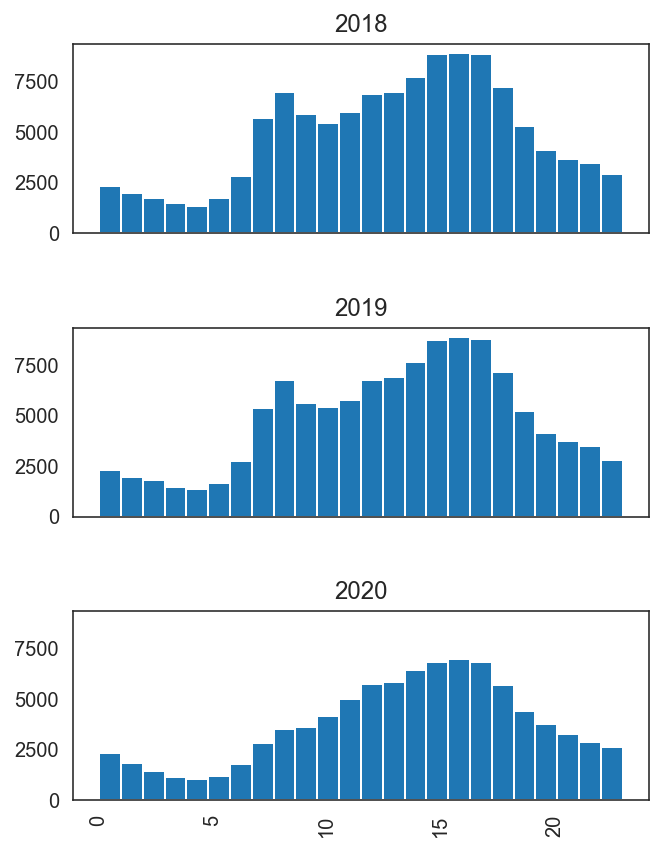

In [25]:
# Crashes
crash_df.hist('crash_hour',bins=24,by='crash_year',layout=(3,1),figsize=(5,7),sharey=True,sharex=True);

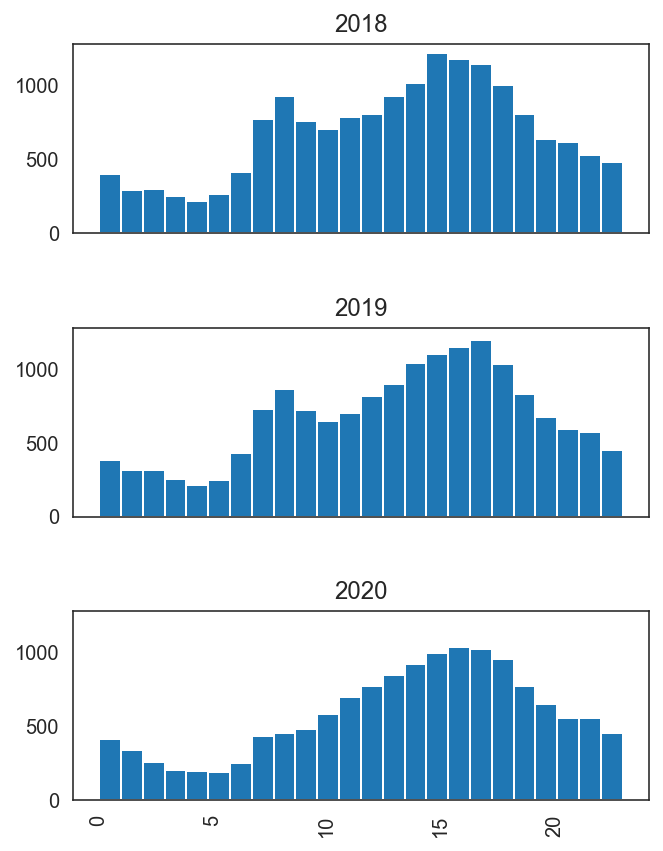

In [26]:
# Crahes that has injuries
crash_df.query('has_injuries == 1').hist('crash_hour',bins=24,by='crash_year',layout=(3,1),figsize=(5,7),sharey=True,sharex=True);

In [27]:
z = pd.cut(crash_df.crash_hour, bins=[-np.inf,6,12,18,np.inf], labels=['overnight','morning','mid_day','evening'])

In [28]:
z

0         overnight
1         overnight
2         overnight
3         overnight
4         overnight
            ...    
328784      evening
328785      evening
328786      evening
328787      evening
328789      evening
Name: crash_hour, Length: 326488, dtype: category
Categories (4, object): ['overnight' < 'morning' < 'mid_day' < 'evening']

In [29]:
z.value_counts()

mid_day      135331
morning       97577
evening       55809
overnight     37771
Name: crash_hour, dtype: int64

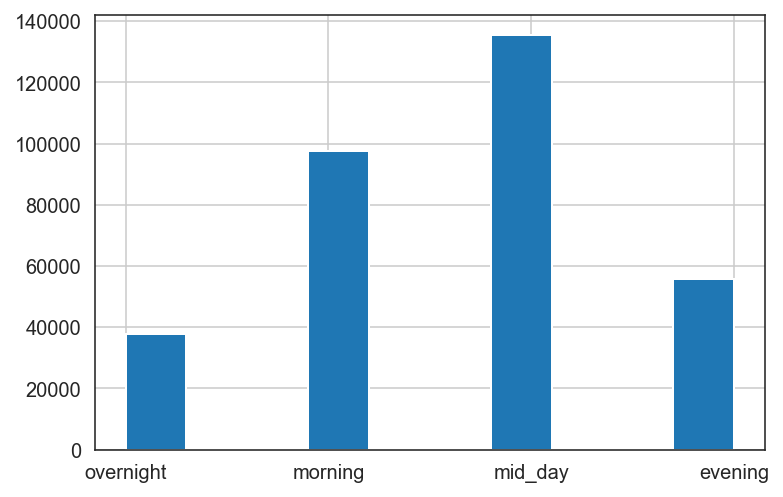

In [30]:
z.hist();

In [31]:
crash_df.crash_hour.isna().sum()

0

In [32]:
z.isna().sum()

0

In [33]:
crash_df.crash_hour.describe()

count   326,488.00
mean         13.20
std           5.55
min           0.00
25%           9.00
50%          14.00
75%          17.00
max          23.00
Name: crash_hour, dtype: float64

# Analaysis

Let's try out some aggreggations

In [34]:
crash_agg = crash_df.groupby([
    'crash_year',
    'crash_month',
#    'crash_day_of_week',
    'crash_hour',
#    'weather_condition'
]).agg({
    'injuries_total':np.sum,
    'injuries_fatal':np.sum
}
).fillna(0).reset_index()
crash_agg

crash_year  crash_month  crash_hour  injuries_total  injuries_fatal
0          2018            1           0              31               0
1          2018            1           1              21               3
2          2018            1           2              35               4
3          2018            1           3              27               0
4          2018            1           4              20               0
..          ...          ...         ...             ...             ...
859        2020           12          19              81               0
860        2020           12          20              62               4
861        2020           12          21              68               0
862        2020           12          22              42               0
863        2020           12          23              48               2

[864 rows x 5 columns]

In [35]:
crash_agg.pivot_table(index=['crash_month'],columns='crash_year',values=['injuries_total','injuries_fatal'],aggfunc='sum')

injuries_fatal           injuries_total            
crash_year            2018 2019 2020           2018  2019  2020
crash_month                                                    
1                       11   11    7           1777  1500  1632
2                        6    4   10           1287  1404  1651
3                       11    9    3           1639  1706  1413
4                       11    6   11           1776  1756   893
5                        7    9   12           2144  2125  1409
6                       11   11   15           2003  2107  1834
7                       21    8   22           2155  2119  2128
8                       13   14   12           2034  2115  2107
9                        9   11   18           1948  1948  1874
10                      13    8   20           2028  2057  1839
11                       5   10    9           1731  1830  1474
12                       9    5   15           1905  1613  1375

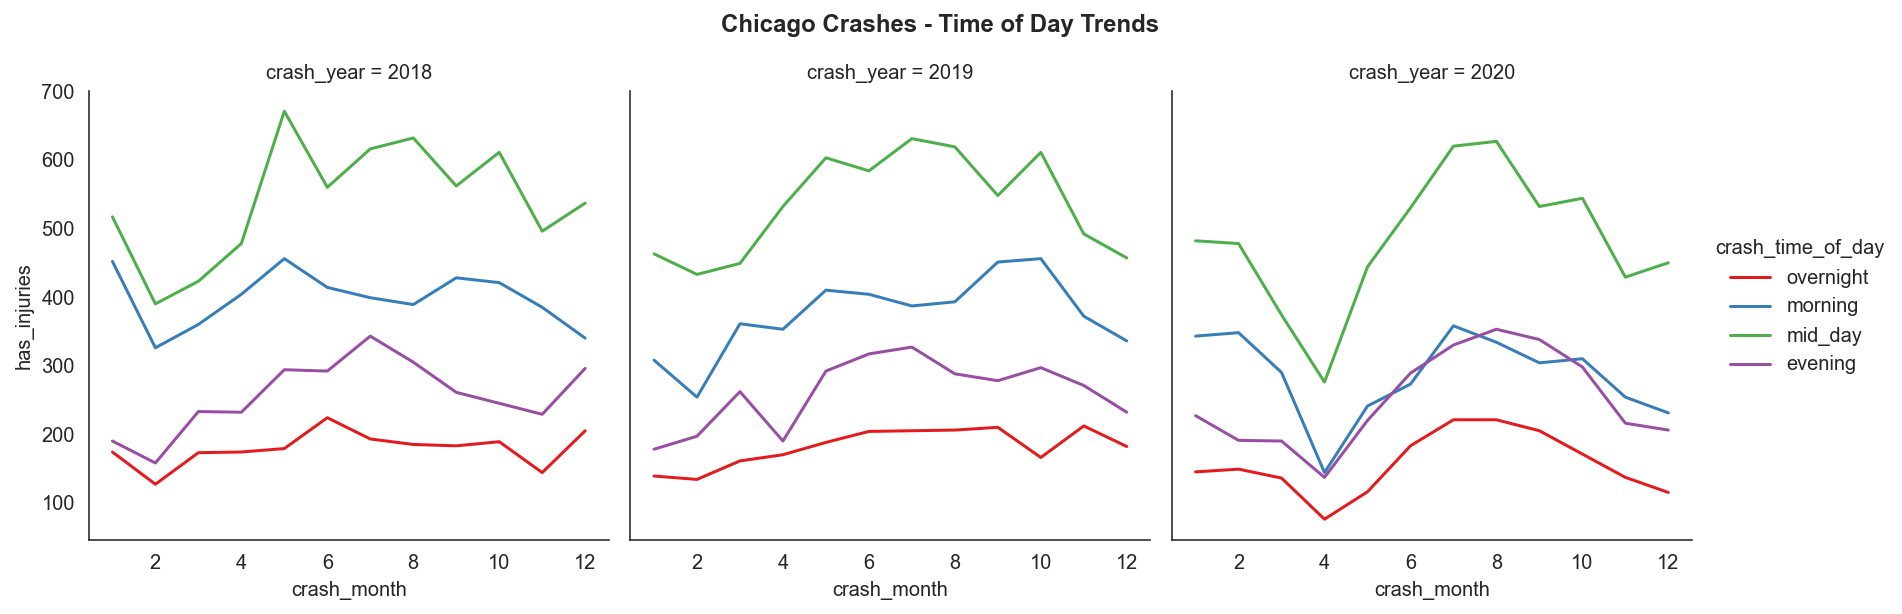

In [36]:
crash_agg = crash_df.groupby([
    'crash_year',
    'crash_month',
#    'crash_day_of_week',
#    'crash_hour',
    'crash_time_of_day',
#    'weather_condition'
]).agg({
    'has_injuries':np.sum,
    'has_fatal':np.sum,
    'injuries_total':np.sum,
    'injuries_fatal':np.sum
}
).fillna(0).reset_index()

g = sns.FacetGrid(crash_agg, col='crash_year', hue='crash_time_of_day', palette='Set1', col_wrap=3, height=4)
g.map_dataframe(sns.lineplot,'crash_month', 'has_injuries')
g.fig.suptitle('Chicago Crashes - Time of Day Trends', y=1.05, fontweight='bold')
g.add_legend();

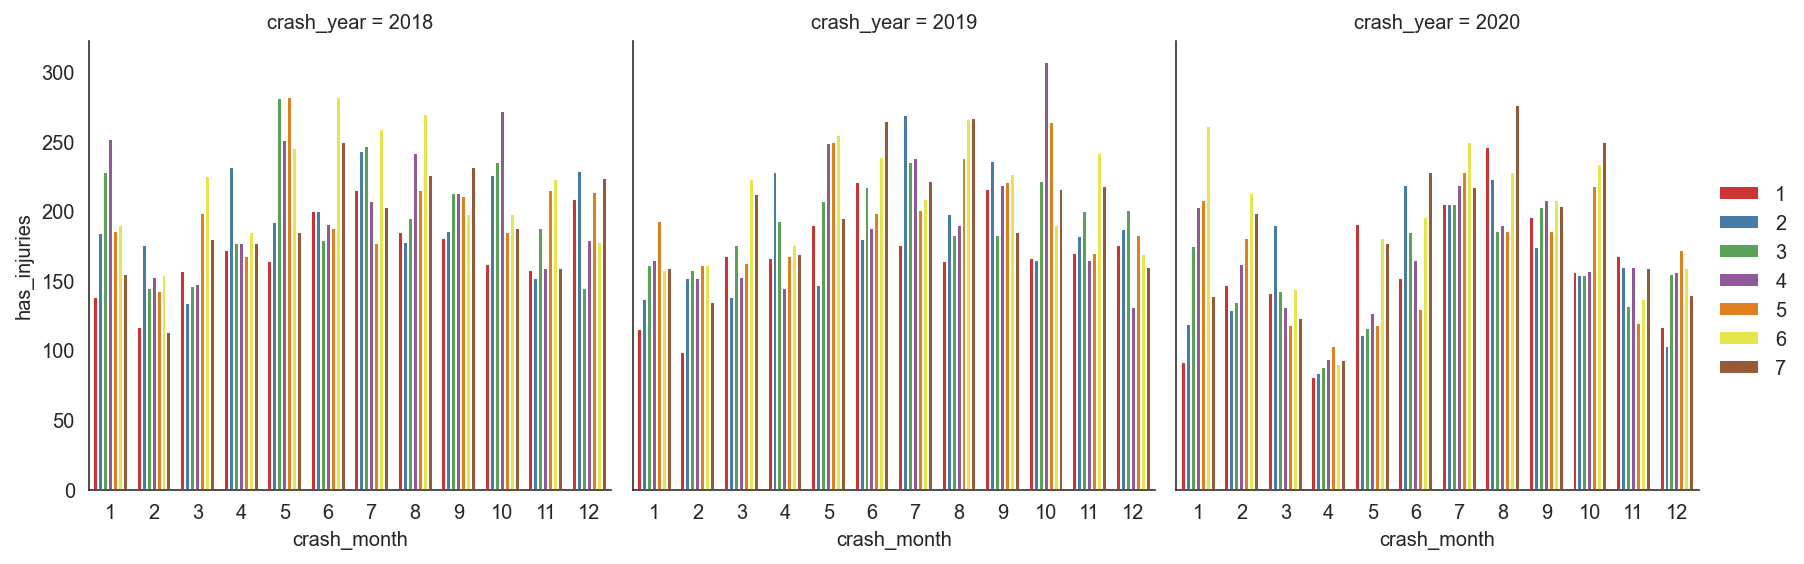

In [37]:
crash_agg = crash_df.groupby([
    'crash_year',
    'crash_month',
    'crash_day_of_week',
#    'crash_hour',
#    'weather_condition'
]).agg({
    'has_injuries':np.sum,
    'injuries_total':np.sum,
    'injuries_fatal':np.sum
}
).fillna(0).reset_index()

g = sns.FacetGrid(crash_agg, col='crash_year',  col_wrap=3, height=4)
g.map_dataframe(sns.barplot,'crash_month','has_injuries',hue='crash_day_of_week',palette='Set1',)
g.add_legend();

In [38]:
(crash_df.weather_condition == 'OTHER').sum()

1071

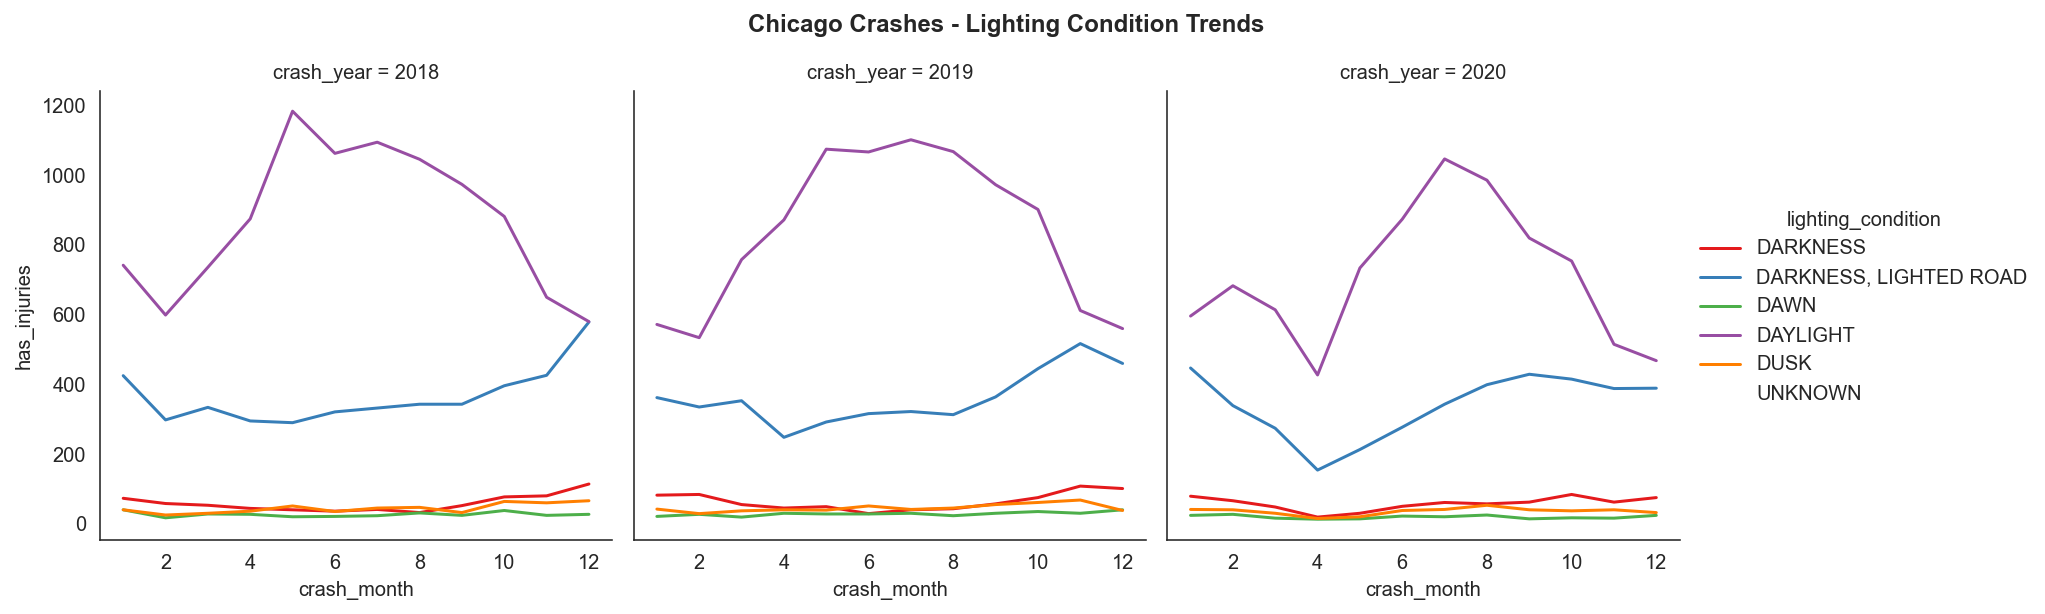

In [39]:
crash_agg = crash_df.groupby([
    'crash_year',
    'crash_month',
#    'crash_day_of_week',
#    'crash_hour',
    'lighting_condition'
]).agg({
    'has_injuries':np.sum,
    'injuries_total':np.sum,
    'injuries_fatal':np.sum
}
).fillna(0).reset_index().query('lighting_condition not in ["UNKNOWN"]')

g = sns.FacetGrid(crash_agg, col='crash_year', hue='lighting_condition', palette='Set1', col_wrap=3, height=4)
g.map_dataframe(sns.lineplot,'crash_month', 'has_injuries')
g.fig.suptitle('Chicago Crashes - Lighting Condition Trends', y=1.05, fontweight='bold')
g.add_legend();

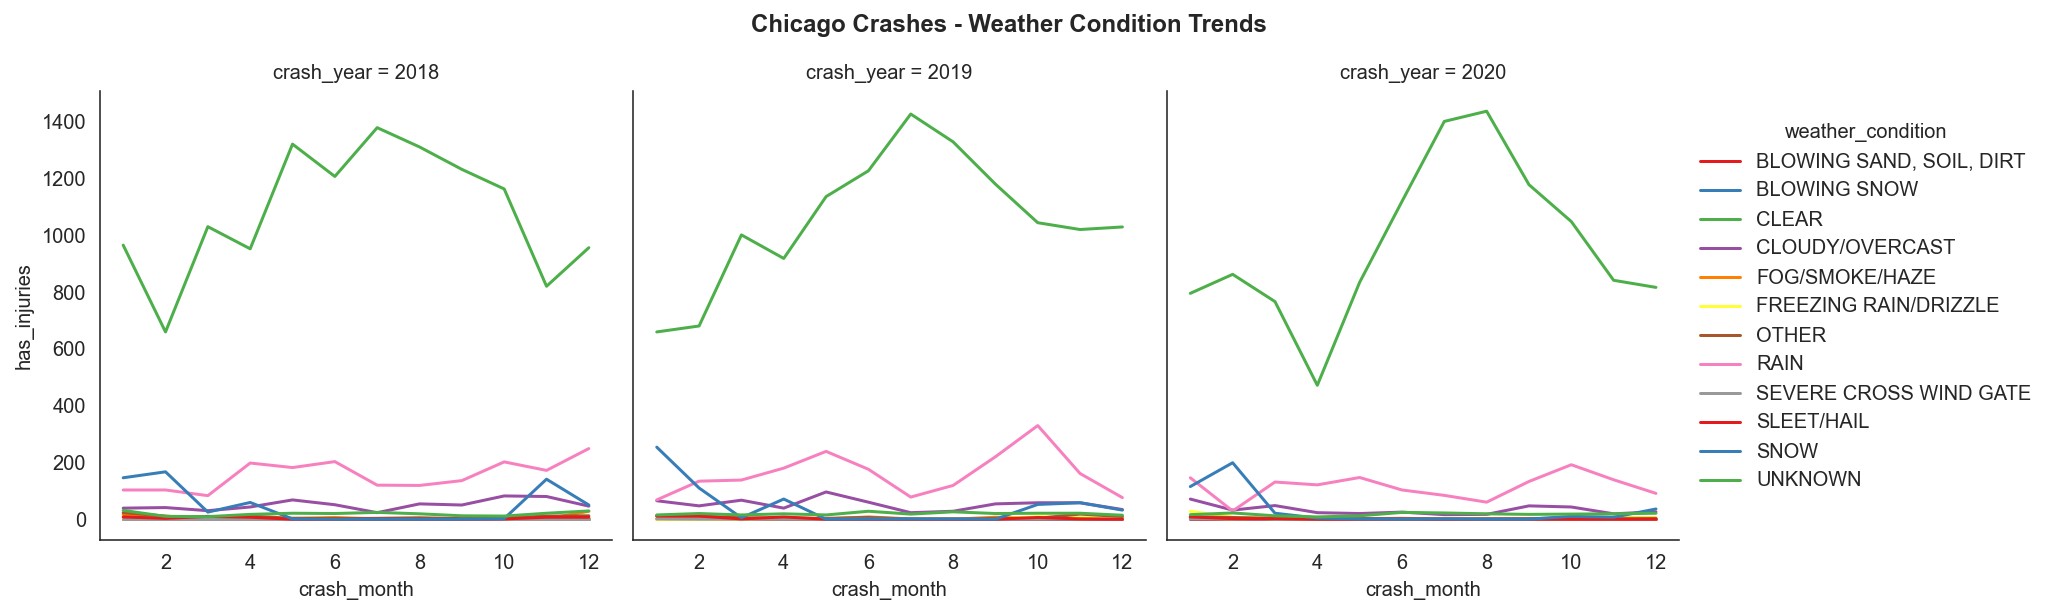

In [40]:
crash_agg = crash_df.groupby([
    'crash_year',
    'crash_month',
#    'crash_day_of_week',
#    'crash_hour',
    'weather_condition'
]).agg({
    'has_injuries':np.sum,
    'injuries_total':np.sum,
    'injuries_fatal':np.sum
}
).fillna(0).reset_index()#.query('weather_condition not in ["CLEAR"]')

g = sns.FacetGrid(crash_agg, col='crash_year', hue='weather_condition', palette='Set1', col_wrap=3, height=4)
g.map_dataframe(sns.lineplot,'crash_month', 'has_injuries')
g.fig.suptitle('Chicago Crashes - Weather Condition Trends', y=1.05, fontweight='bold')
g.add_legend();

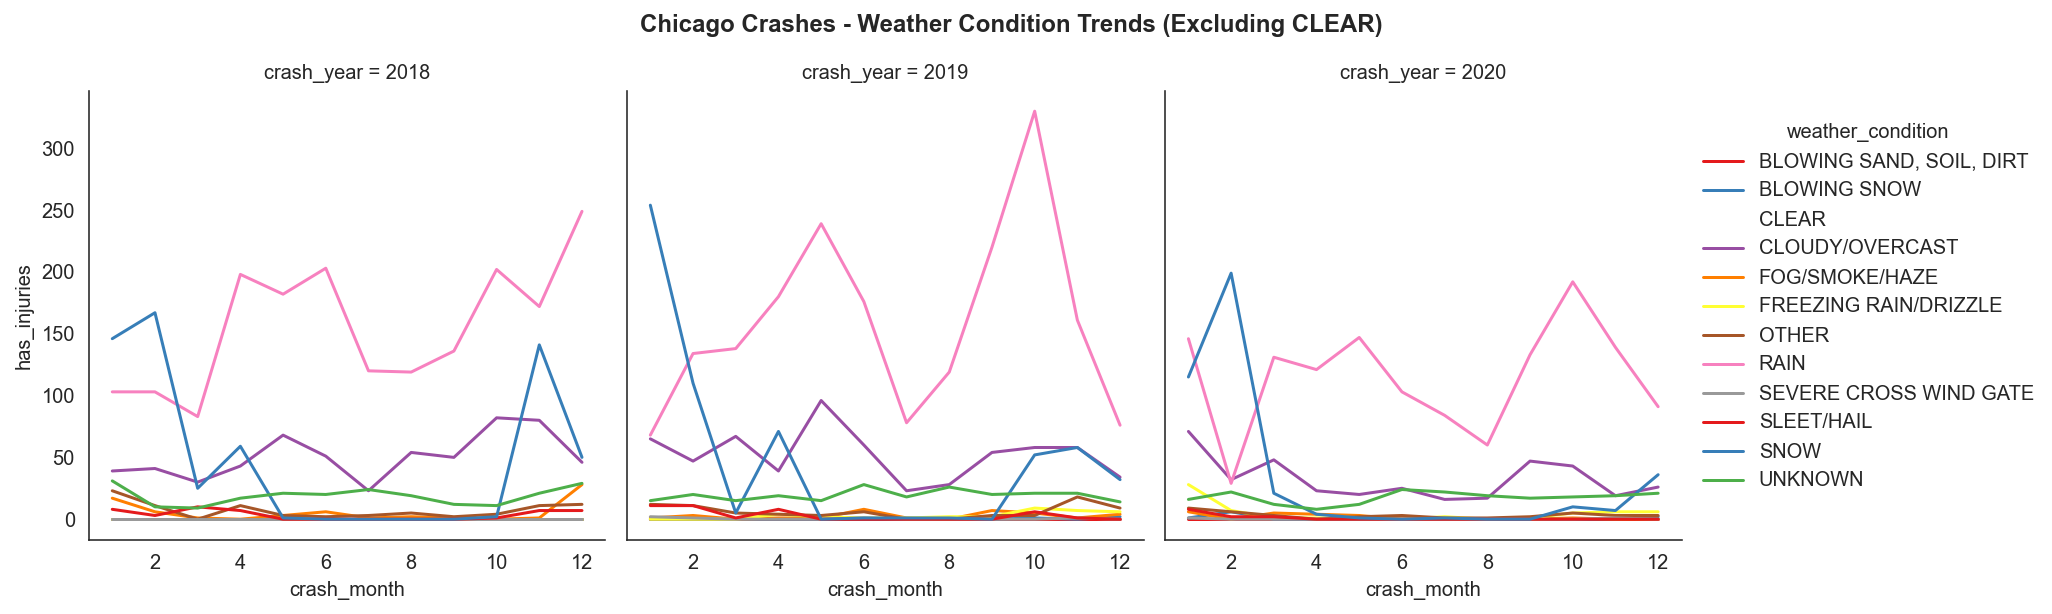

In [41]:
crash_agg = crash_df.groupby([
    'crash_year',
    'crash_month',
#    'crash_day_of_week',
#    'crash_hour',
    'weather_condition'
]).agg({
    'has_injuries':np.sum,
    'injuries_total':np.sum,
    'injuries_fatal':np.sum
}
).fillna(0).reset_index().query('weather_condition not in ["CLEAR"]')

g = sns.FacetGrid(crash_agg, col='crash_year', hue='weather_condition', palette='Set1', col_wrap=3, height=4)
g.map_dataframe(sns.lineplot,'crash_month', 'has_injuries')
g.fig.suptitle('Chicago Crashes - Weather Condition Trends (Excluding CLEAR)', y=1.05, fontweight='bold')
g.add_legend();

In [42]:
from sklearn.preprocessing import StandardScaler
crash_sdf = crash_df.copy()
col_names = ['injuries_total', 'injuries_fatal']
features = crash_sdf[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
crash_sdf[col_names] = features
display(crash_sdf.head(5))

crash_date  crash_year  crash_month  crash_day_of_week  crash_hour crash_time_of_day  latitude  longitude  \
0 2018-01-01 00:00:00        2018            1                  2           0         overnight     41.96     -87.65   
1 2018-01-01 00:00:00        2018            1                  2           0         overnight     41.80     -87.59   
2 2018-01-01 00:00:00        2018            1                  2           0         overnight     41.68     -87.64   
3 2018-01-01 00:05:00        2018            1                  2           0         overnight     41.95     -87.67   
4 2018-01-01 00:07:00        2018            1                  2           0         overnight     41.68     -87.62   

   beat_of_occurrence             address street_no street_direction  street_name  posted_speed_limit  \
0                1915    815 W CUYLER AVE       815                W   CUYLER AVE                  30   
1                 234   5214 S HARPER AVE      5214                S   HARPER AVE                  20   
2                 524      735 W 117TH ST       735                W     117TH ST                  25   
3                1922  3719 N ASHLAND AVE      3719                N  ASHLAND AVE                  30   
4                 522    11546 S STATE ST     11546                S     STATE ST                  35   

  traffic_control_device      device_condition weather_condition      lighting_condition trafficway_type  \
0            NO CONTROLS           NO CONTROLS             CLEAR                 UNKNOWN         ONE-WAY   
1            NO CONTROLS           NO CONTROLS             CLEAR                DAYLIGHT     NOT DIVIDED   
2            NO CONTROLS           NO CONTROLS           UNKNOWN                 UNKNOWN     NOT DIVIDED   
3            NO CONTROLS           NO CONTROLS             CLEAR  DARKNESS, LIGHTED ROAD     NOT DIVIDED   
4            NO CONTROLS  FUNCTIONING PROPERLY              SNOW  DARKNESS, LIGHTED ROAD     NOT DIVIDED   

            alignment roadway_surface_cond road_defect      first_crash_type prim_contributory_cause  \
0  STRAIGHT AND LEVEL              UNKNOWN     UNKNOWN  PARKED MOTOR VEHICLE     UNABLE TO DETERMINE   
1  STRAIGHT AND LEVEL                  DRY  NO DEFECTS  PARKED MOTOR VEHICLE     UNABLE TO DETERMINE   
2  STRAIGHT AND LEVEL              UNKNOWN     UNKNOWN  PARKED MOTOR VEHICLE     UNABLE TO DETERMINE   
3  STRAIGHT AND LEVEL              UNKNOWN     UNKNOWN  PARKED MOTOR VEHICLE     UNABLE TO DETERMINE   
4  STRAIGHT AND LEVEL        SNOW OR SLUSH  NO DEFECTS  PARKED MOTOR VEHICLE                 WEATHER   

                   sec_contributory_cause  num_units  has_injuries  has_fatal              crash_type         damage  \
0                     UNABLE TO DETERMINE          2             0          0  NO INJURY / DRIVE AWAY  $501 - $1,500   
1                     UNABLE TO DETERMINE          2             0          0  NO INJURY / DRIVE AWAY    OVER $1,500   
2                     UNABLE TO DETERMINE          2             0          0  NO INJURY / DRIVE AWAY  $501 - $1,500   
3                     UNABLE TO DETERMINE          2             0          0  NO INJURY / DRIVE AWAY  $501 - $1,500   
4  FAILING TO REDUCE SPEED TO AVOID CRASH          2             0          0  NO INJURY / DRIVE AWAY    OVER $1,500   

   injuries_total  injuries_fatal  
0           -0.34           -0.03  
1           -0.34           -0.03  
2           -0.34           -0.03  
3           -0.34           -0.03  
4           -0.34           -0.03

/usr/local/Caskroom/miniconda/base/envs/t1/lib/python3.9/site-packages/seaborn/axisgrid.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self.fig.tight_layout(*args, **kwargs)


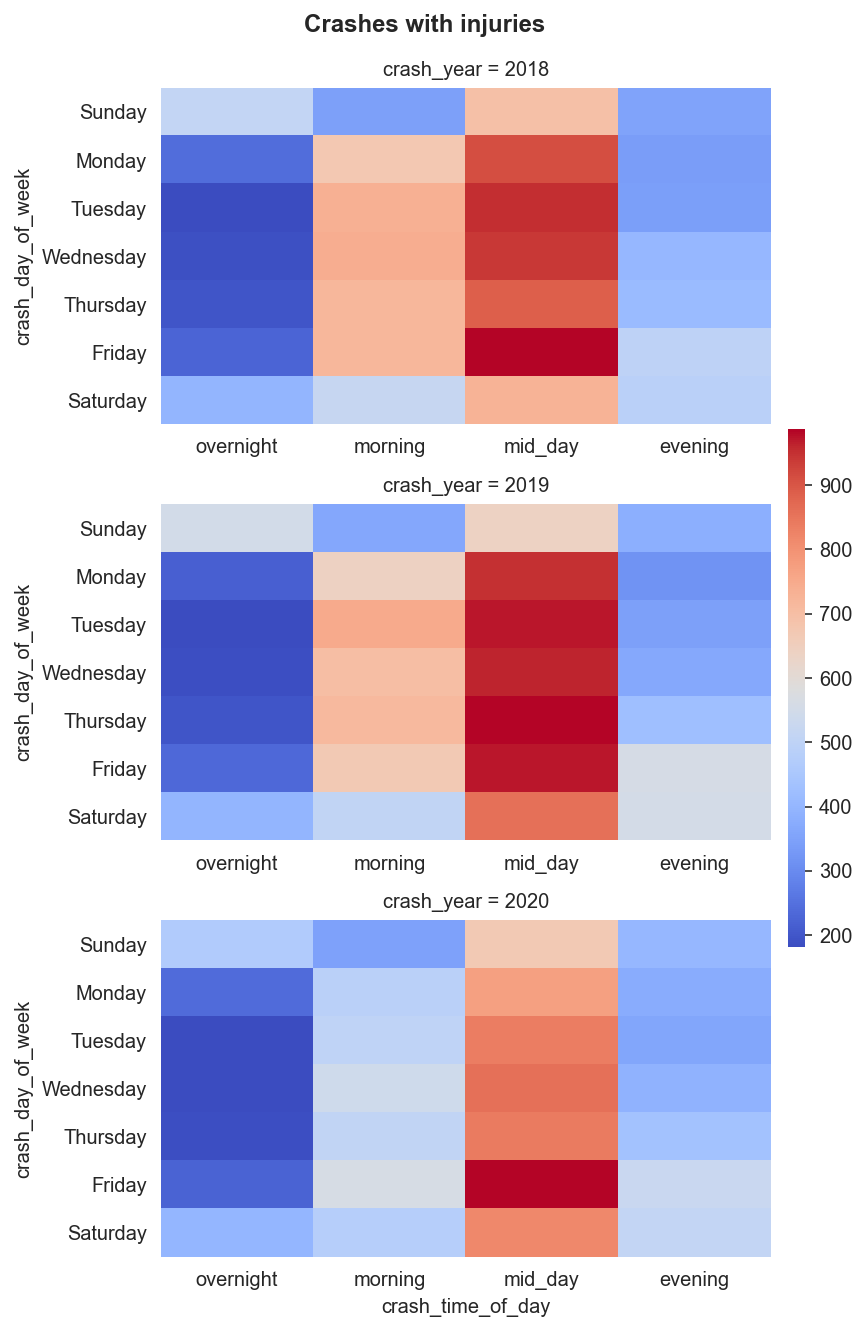

In [43]:
            
def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d = data.pivot_table(index=args[1], columns=args[0], values=args[2], aggfunc=sum)
    ax = sns.heatmap(d, **kwargs, cmap='coolwarm')
    ax.set_yticklabels(week_days.values(),rotation=0)
    #ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

fg = sns.FacetGrid(crash_df, row='crash_year', aspect=2, sharex=False)
cbar_ax = fg.fig.add_axes([.92, .3, .02, .4],)  # <-- Create a colorbar axes
fg.map_dataframe(draw_heatmap, 'crash_time_of_day', 'crash_day_of_week', 'has_injuries', square = False,
                 cbar_ax=cbar_ax,
                 #vmin=0, vmax=1, center=.5
                )
fg.fig.subplots_adjust(right=.9)
fg.fig.suptitle('Crashes with injuries', y=1.02, fontweight='bold')
plt.show()

# Fiddling with Weekends

In [44]:
crash_df.query('crash_day_of_week == 1').crash_date.dt.day_name()[:1]

2236    Sunday
Name: crash_date, dtype: object

In [45]:
crash_df.crash_day_of_week.map(lambda x: 'Weekend' if x in [1,7] else 'Weekday')

0         Weekday
1         Weekday
2         Weekday
3         Weekday
4         Weekday
           ...   
328784    Weekday
328785    Weekday
328786    Weekday
328787    Weekday
328789    Weekday
Name: crash_day_of_week, Length: 326488, dtype: object

/usr/local/Caskroom/miniconda/base/envs/t1/lib/python3.9/site-packages/seaborn/axisgrid.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self.fig.tight_layout(*args, **kwargs)


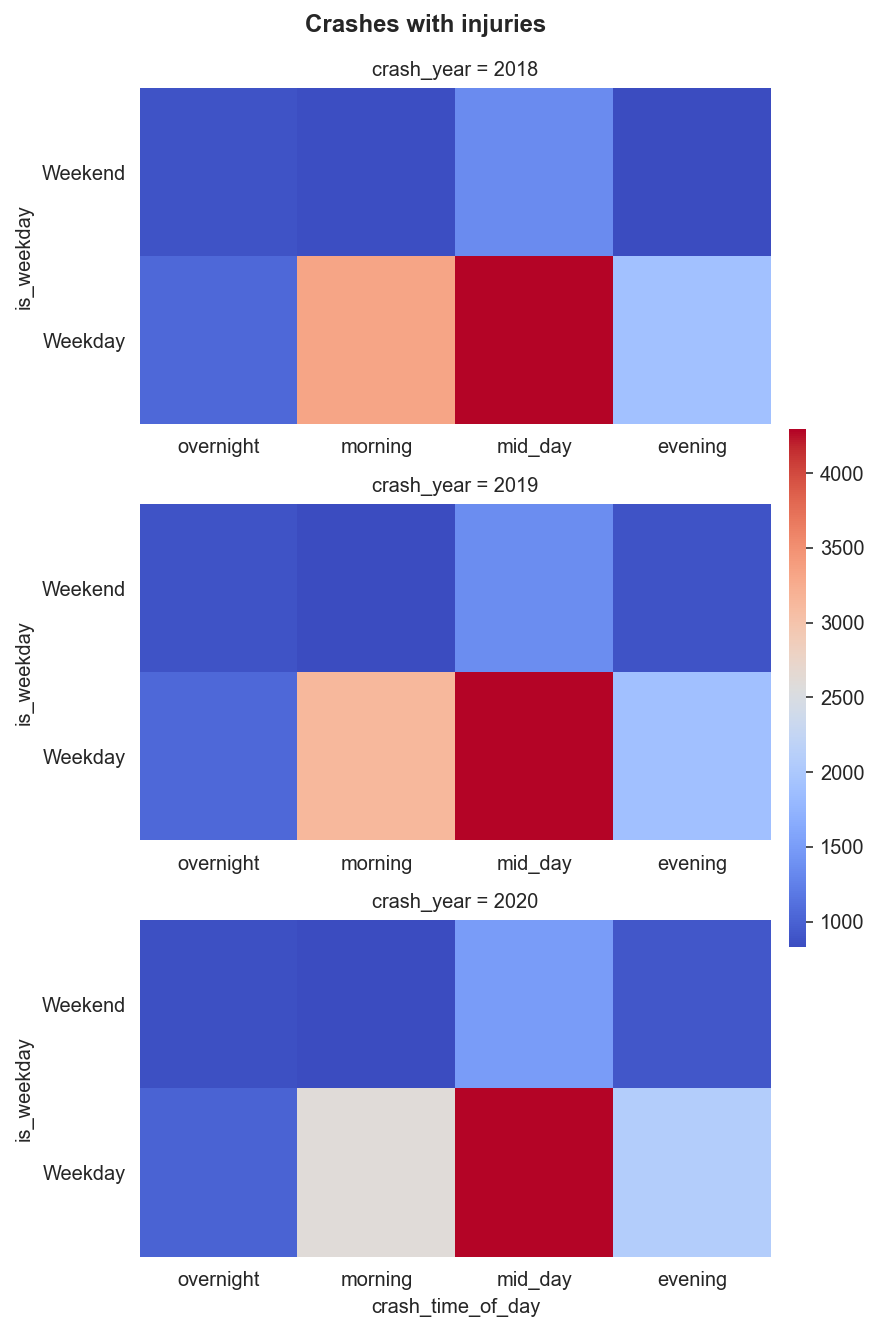

In [46]:
def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d = data.pivot_table(index=args[1], columns=args[0], values=args[2], aggfunc=sum)
    ax = sns.heatmap(d, **kwargs, cmap='coolwarm')
    ax.set_yticklabels(is_weekday.values(),rotation=0)
    #ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
_ = crash_df
_['is_weekday'] = crash_df.crash_day_of_week.map(lambda x: 0 if x in [1,7] else 1)

fg = sns.FacetGrid(_, row='crash_year',  aspect=2, sharex=False)
cbar_ax = fg.fig.add_axes([.92, .3, .02, .4],)  # <-- Create a colorbar axes
fg.map_dataframe(draw_heatmap, 'crash_time_of_day', 'is_weekday', 'has_injuries', square = False,
                 cbar_ax=cbar_ax,
                 #vmin=0, vmax=1, center=.5
                )
fg.fig.subplots_adjust(right=.9)
fg.fig.suptitle('Crashes with injuries', y=1.02, fontweight='bold')
plt.show()

# Plot Map

In [47]:
crash_df.groupby(by=['longitude','latitude']).size().reset_index(name='crashes')

longitude  latitude  crashes
0          -87.93     41.96        1
1          -87.93     41.96        1
2          -87.93     41.96       23
3          -87.93     42.01        1
4          -87.93     41.96        4
...           ...       ...      ...
162703     -87.52     41.70        1
162704     -87.52     41.70        5
162705     -87.52     41.70        1
162706     -87.52     41.70        2
162707     -87.52     41.70        6

[162708 rows x 3 columns]

In [48]:
crash_df_ = crash_df.copy()
#crash_df_['crash_year'] = crash_df_['crash_year'].astype('category')
#crash_df_['longitude'] = crash_df_['longitude'].round(4)
#crash_df_['latitude'] = crash_df_['latitude'].round(4)
crash_df_ = crash_df_.groupby(by=['longitude','latitude','crash_year']).agg(crashes=('has_injuries', 'count'), has_injuries=('has_injuries', 'max'), is_weekday=('is_weekday', 'max')).reset_index().query('crashes > 0')

In [49]:
crash_df_

longitude  latitude  crash_year  crashes  has_injuries  is_weekday
0          -87.93     41.96        2020        1             0           1
1          -87.93     41.96        2019        1             0           1
2          -87.93     41.96        2019        8             1           1
3          -87.93     41.96        2020       15             1           1
4          -87.93     42.01        2019        1             1           0
...           ...       ...         ...      ...           ...         ...
212875     -87.52     41.70        2020        2             0           1
212876     -87.52     41.70        2019        1             0           1
212877     -87.52     41.70        2020        2             0           0
212878     -87.52     41.70        2019        2             1           1
212879     -87.52     41.70        2020        4             0           1

[212880 rows x 6 columns]

In [50]:
crash_df_.query('crashes>5')

longitude  latitude  crash_year  crashes  has_injuries  is_weekday
2          -87.93     41.96        2019        8             1           1
3          -87.93     41.96        2020       15             1           1
15         -87.91     41.95        2019        8             1           1
16         -87.91     41.95        2020       14             1           1
21         -87.91     41.98        2018      111             1           1
...           ...       ...         ...      ...           ...         ...
212813     -87.53     41.70        2019        7             1           1
212840     -87.53     41.70        2018       10             0           1
212842     -87.53     41.70        2020        7             0           1
212858     -87.53     41.70        2018        7             0           1
212859     -87.53     41.70        2019        7             0           1

[5441 rows x 6 columns]

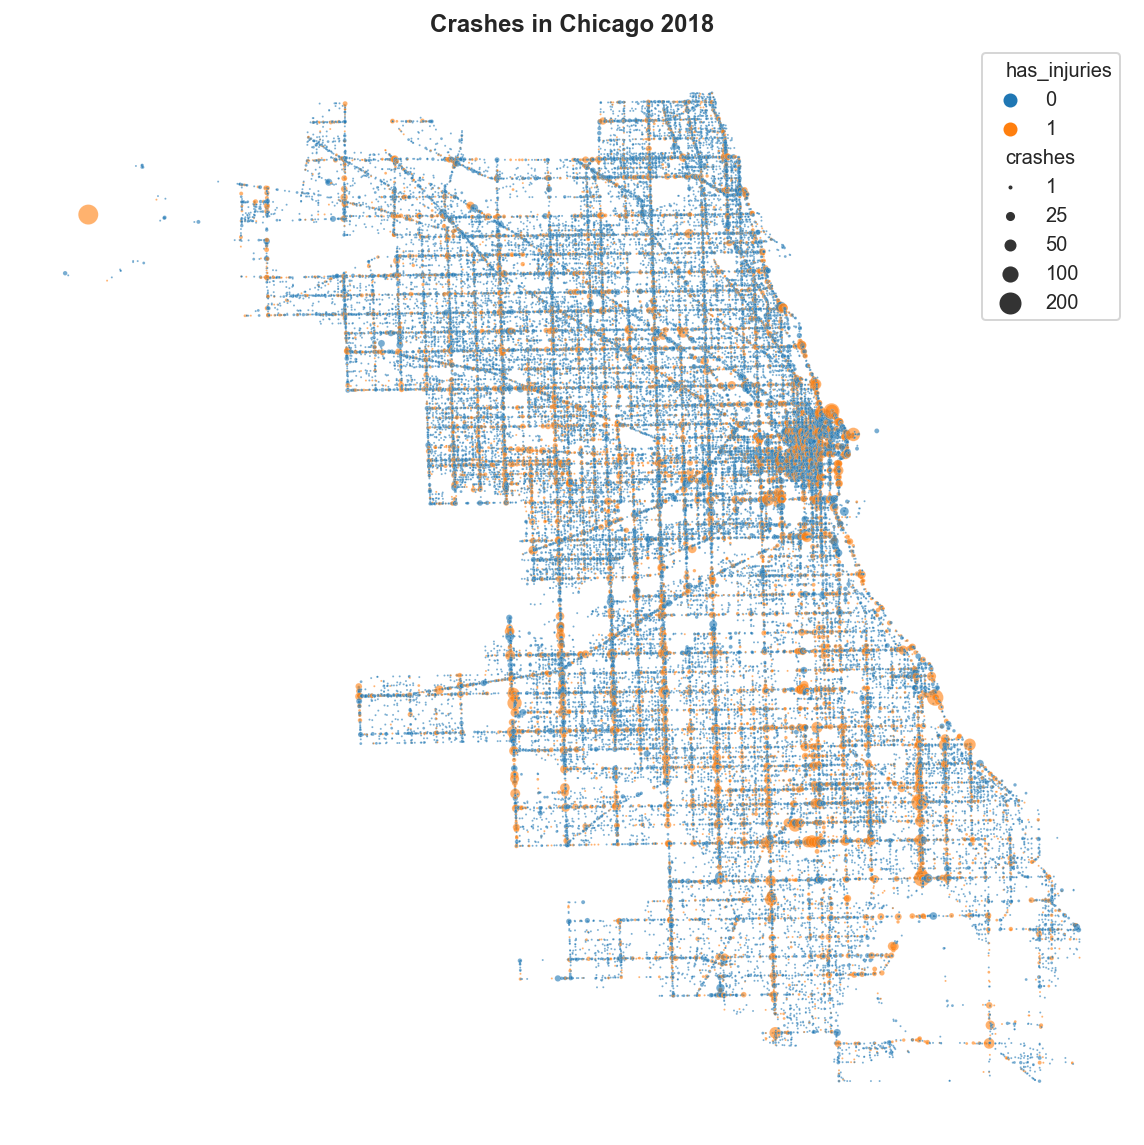

In [51]:
plt.subplots(figsize=(10,10))
fg = sns.scatterplot(data=crash_df_.query('crash_year == 2018'), x='longitude',y='latitude',
                hue='has_injuries', sizes={1:1,25:12.5,50:25,100:50,200:100}, size_norm=(1,100), size='crashes', alpha=.6)
fg.set_axis_off()
fg.set_title('Crashes in Chicago 2018',fontweight='bold');

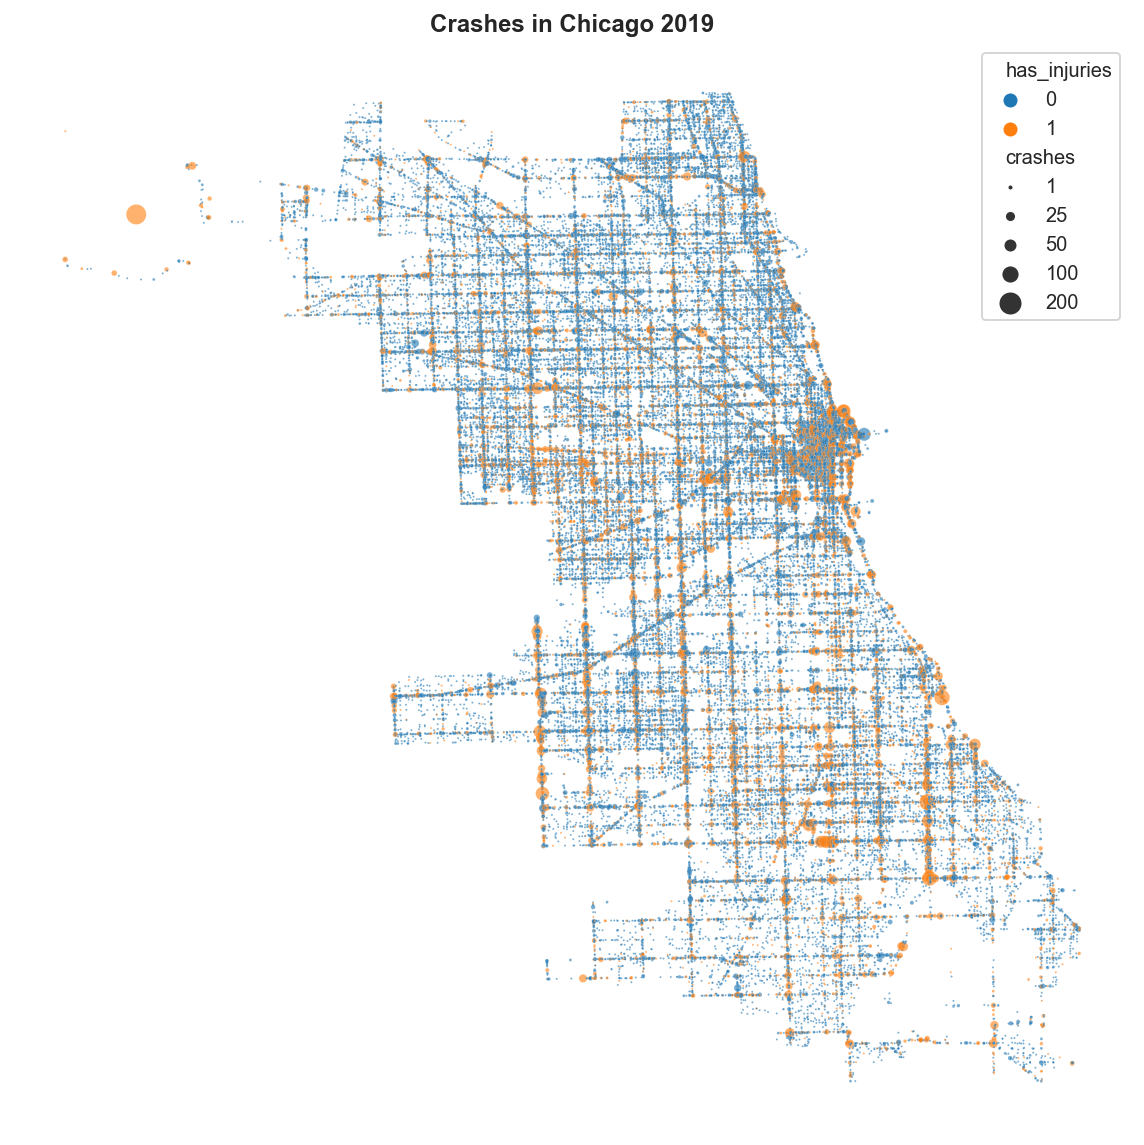

In [52]:
plt.subplots(figsize=(10,10))
fg = sns.scatterplot(data=crash_df_.query('crash_year == 2019'), x='longitude',y='latitude',
                hue='has_injuries', sizes={1:1,25:12.5,50:25,100:50,200:100}, size_norm=(1,100), size='crashes', alpha=.6)
fg.set_axis_off()
fg.set_title('Crashes in Chicago 2019',fontweight='bold');

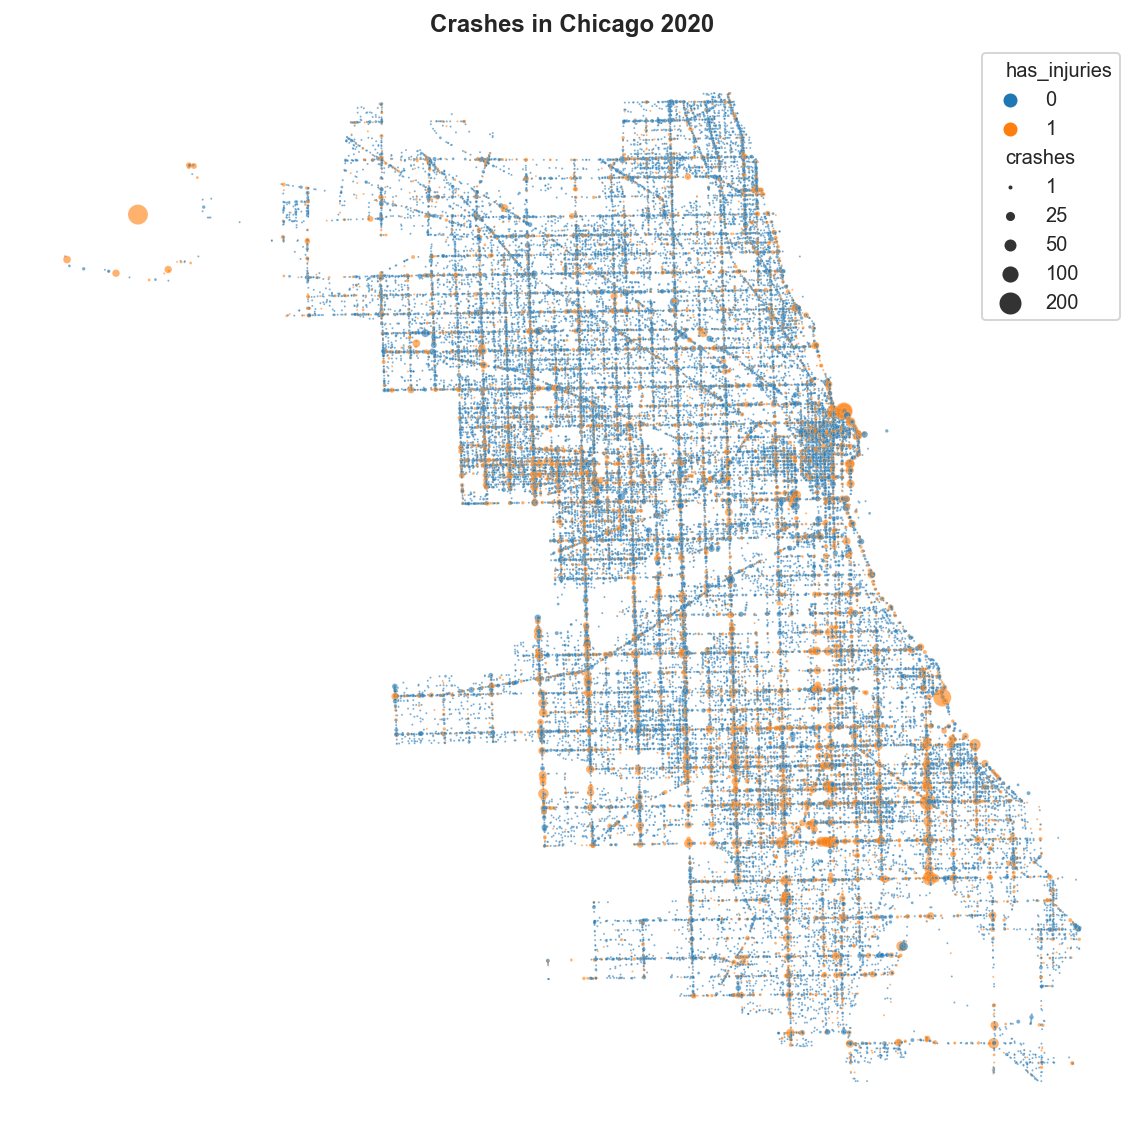

In [53]:
plt.subplots(figsize=(10,10))
fg = sns.scatterplot(data=crash_df_.query('crash_year == 2020'), x='longitude',y='latitude',
                hue='has_injuries', sizes={1:1,25:12.5,50:25,100:50,200:100}, size_norm=(1,100), size='crashes', alpha=.6)
fg.set_axis_off()
fg.set_title('Crashes in Chicago 2020',fontweight='bold');

in 2020 we can see shift in crash sites having injuries away from downtown

In [54]:
#from matplotlib import colors
#cmap = colors.ListedColormap(['green', 'yellow', 'red'])
#cmap

# Next steps for modeling

![](https://scikit-learn.org/stable/_static/ml_map.png)